# Import Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score



# Import Dataset

In [2]:
data=pd.read_csv("/content/income_evaluation.csv")

# Data Understanding

In [3]:
# see first five rows with columns
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#see the last five rows with columns
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# the count of rows and columns
data.shape

(32561, 15)

In [6]:
#check column names
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
#remove spaces at the begining of column names
data.columns=data.columns.str.strip()


In [8]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
# check the types of the data
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [10]:
#check null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
#check unique values
data.apply(lambda x: x.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [12]:
#check unique values in categorical variable
see_all=data[['workclass',  'education', 'education-num',
      'marital-status', 'occupation', 'relationship', 'race', 'sex',
      'native-country']].apply(lambda x: x.unique())

In [13]:
#unique values 
pd.DataFrame(see_all).to_string()

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            0\nworkclass                                                                                                                                                                                                                                                                                                                                                                 [ State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  ?,  Self-emp-inc,  Without-pay,  Never-worked]\neducation                                

In [14]:
#check statistics properities
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Analysis

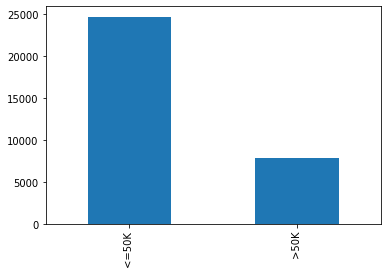

In [15]:
# check balance in target with graph
data.income.value_counts().plot(kind="bar")

In [16]:
# show imbalance with percent
data.income.value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

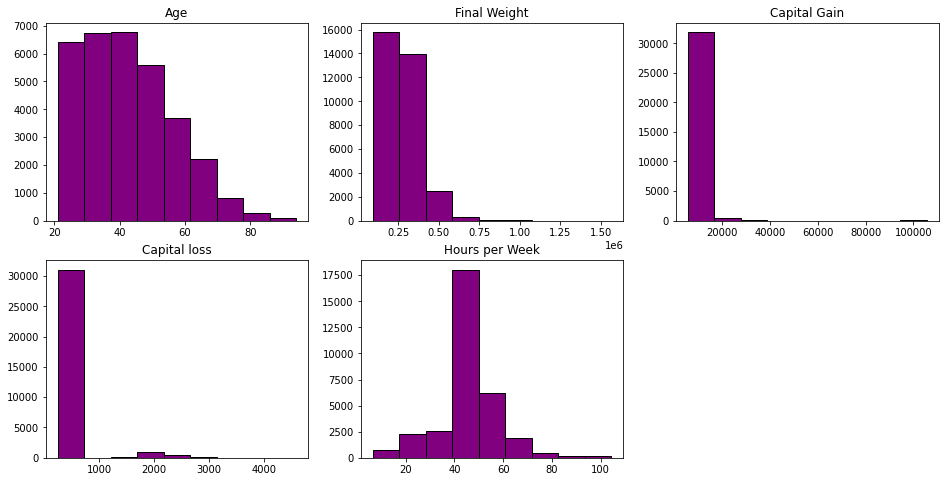

In [17]:
#check distrubation of numeric variables
plt.figure(figsize=(16, 8))
plt.subplot(2,3, 1)
plt.hist(data['age'], bins=9, align='right', color='purple', edgecolor='black')
plt.title("Age")

plt.subplot(2,3, 2)
plt.hist(data['fnlwgt'], bins=9, align='right', color='purple', edgecolor='black')
plt.title("Final Weight")

plt.subplot(2,3, 3)
plt.hist(data['capital-gain'], bins=9, align='right', color='purple', edgecolor='black')
plt.title("Capital Gain")
plt.subplot(2,3, 4)
plt.hist(data['capital-loss'], bins=9, align='right', color='purple', edgecolor='black')
plt.title("Capital loss")
plt.subplot(2,3, 5)
plt.hist(data['hours-per-week'], bins=9, align='right', color='purple', edgecolor='black')
plt.title("Hours per Week")
plt.show()

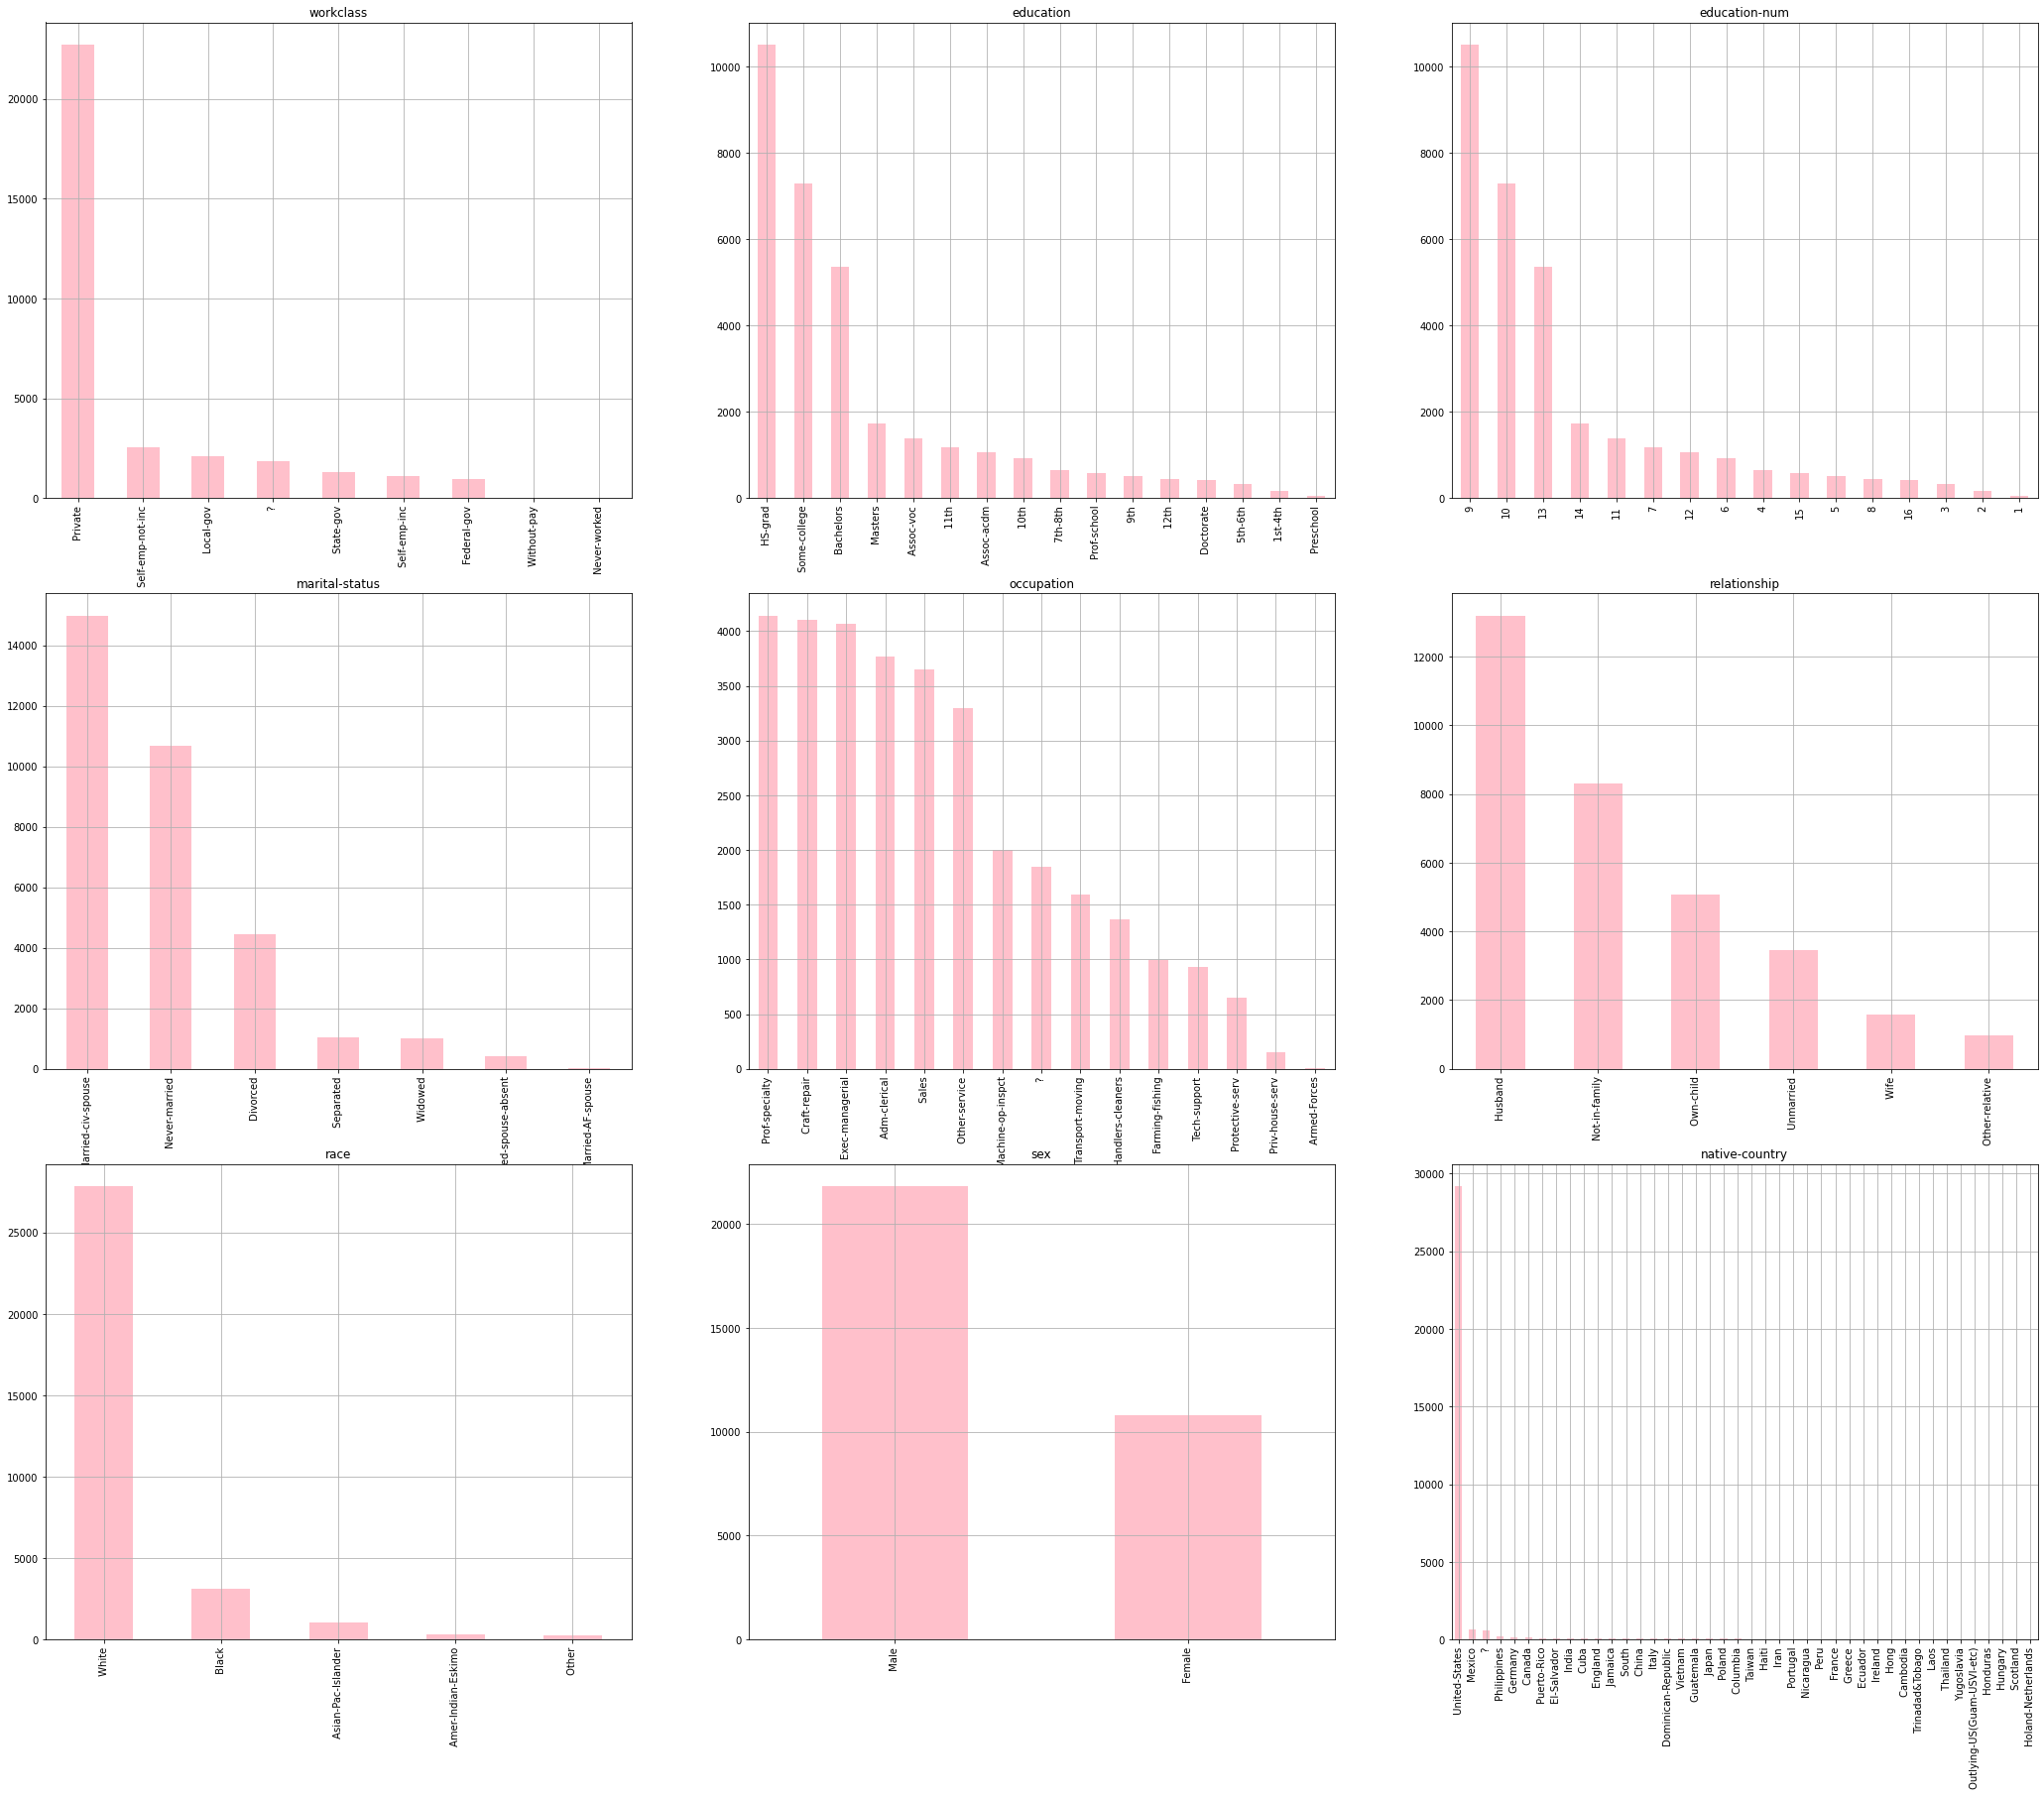

In [18]:
# graph categoric variables 
categoric={'workclass':1,  'education':2, 'education-num':3,
      'marital-status':4, 'occupation':5, 'relationship':6, 'race':7, 'sex':8,
      'native-country':9}

plt.figure(figsize=(36, 30))

for variable, x in categoric.items():
  plt.subplot(3, 3, x)

  data[variable].value_counts().plot(kind="bar", color='pink')
  plt.title(variable)
  plt.grid(True)


There are columns with the sign "?" in the dataset. It had better check how many it is acording to the columns. And I will replace "?" with "Other".

In [19]:
#see how many question marks in the whole dataset
(data.values==' ?').sum()

4262

In [20]:
# see how many question marks in every column
data[data==' ?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [21]:
#replace question marks with "other"
data.replace(" ?", "Other", inplace=True)

In [22]:
data[data==" ?"].count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

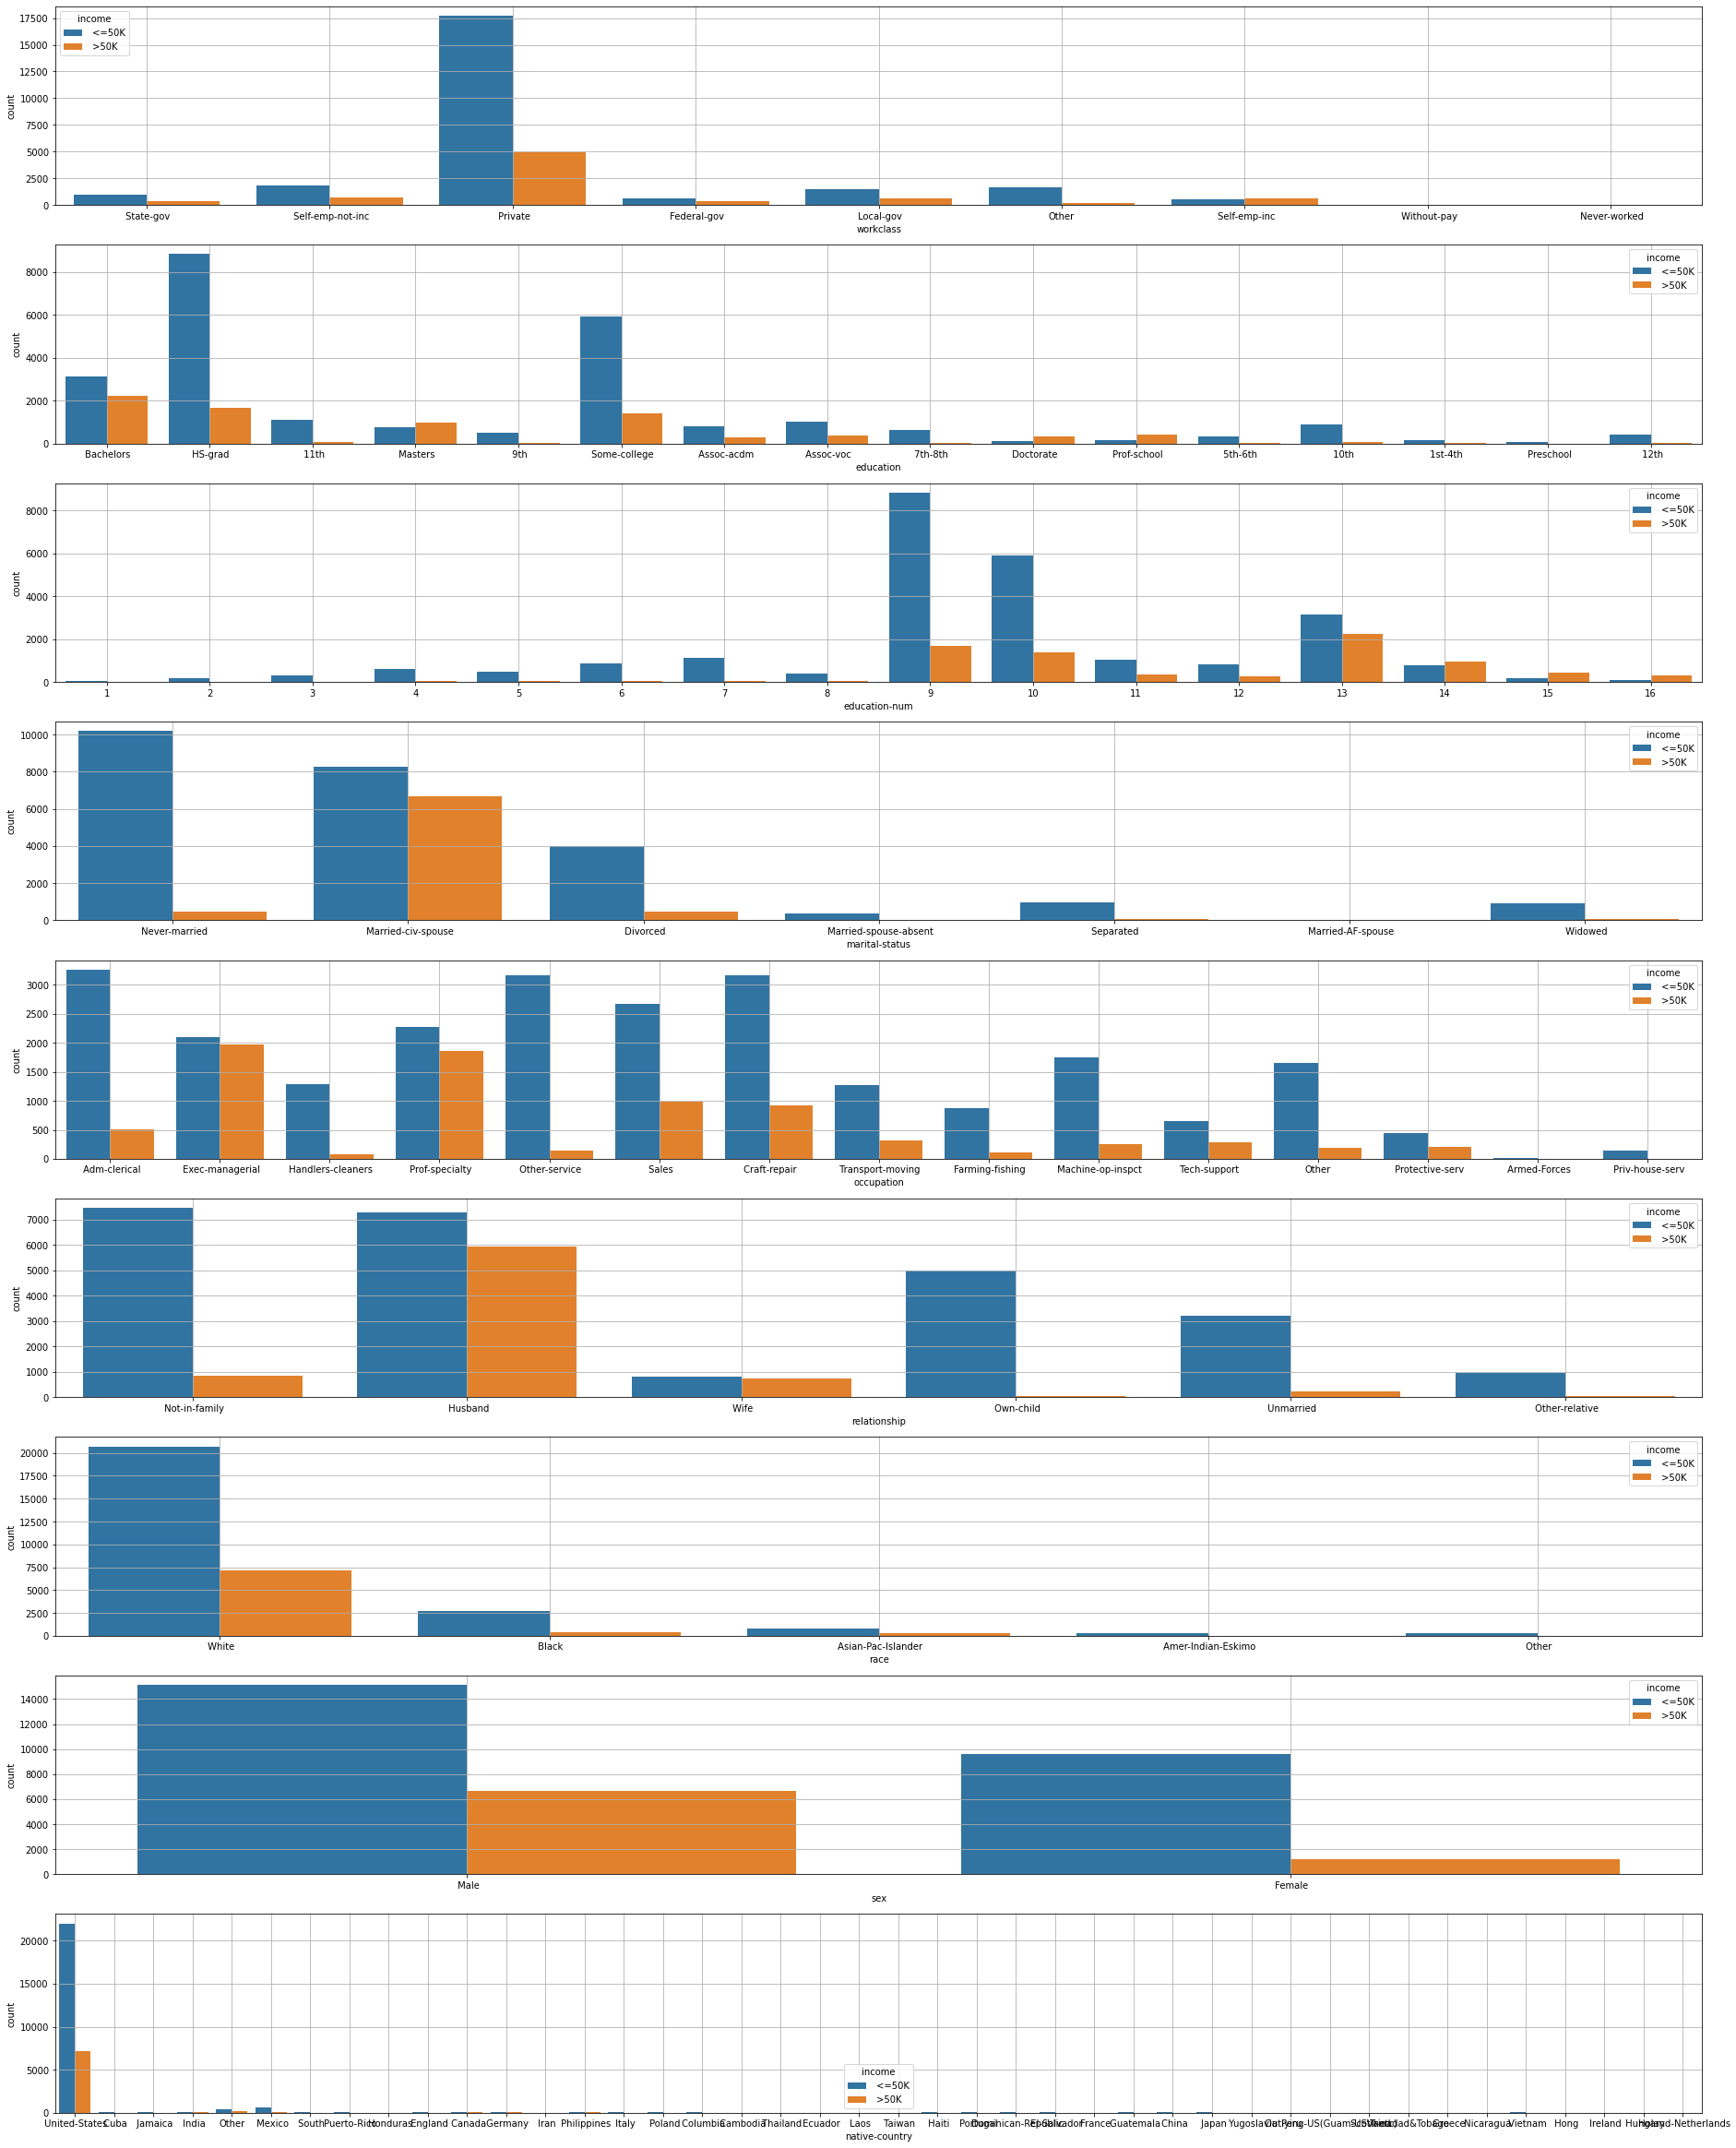

In [23]:
# graph categorical variables to see frequancy of "income" in every category
categoric={'workclass':1,  'education':2, 'education-num':3,
      'marital-status':4, 'occupation':5, 'relationship':6, 'race':7, 'sex':8,
      'native-country':9}

plt.figure(figsize=(32, 42))

for variable, x in categoric.items():
  plt.subplot(9, 1, x)

  sns.countplot(data[variable], hue=data["income"])
  
  plt.grid(True)


# Data Preprocessing

In [24]:
# see unique values in the column "workclass"
data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Other', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
# reorganize categories o "workclass"
data["workclass"].replace((" State-gov| Federal-gov| Local-gov| Self-emp-inc"), "Public service", regex=True, inplace=True)
data["workclass"].replace(" Self-emp-not-inc", "Self-employed", regex=True, inplace=True)
data["workclass"].replace(" Without-pay", "Other", regex=True, inplace=True)

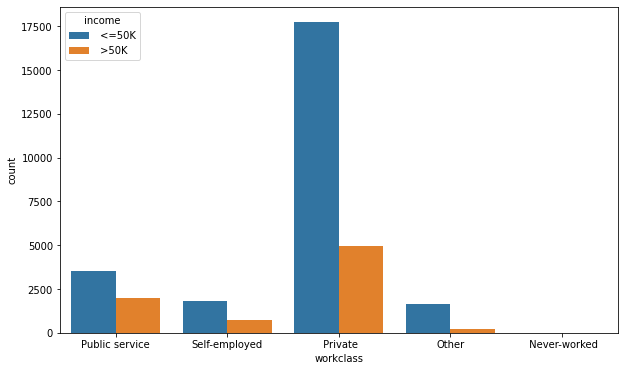

In [26]:
#graph "workclass" with frequancy of " income"
plt.figure(figsize=(10, 6))
sns.countplot(x="workclass", hue="income", data=data)

In [27]:
# see unique values in the column "education"
data["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
# reorganize categories of "workclass"
data["education"].replace(" Doctorate", "Doctorate", regex=True, inplace=True)
data["education"].replace(" Masters| Prof-school", "Masters", regex=True, inplace=True)
data["education"].replace(" Bachelors", "Bachelors", regex=True, inplace=True)
data["education"].replace(" Some-college| Assoc-acdm| Assoc-voc", "College", regex=True, inplace=True)
data["education"].replace(" HS-grad", "High School", regex=True, inplace=True)
data["education"].replace(" 9th| 7th-8th| 5th-6th| 10th| Preschool| 12th| 1st-4th| 11th", "Dropout", regex=True, inplace=True)

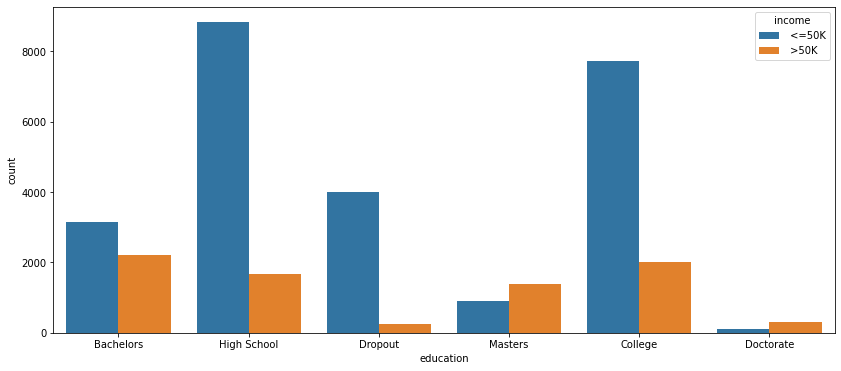

In [29]:
#graph "education" with frequancy of " income"
plt.figure(figsize=(14, 6))
sns.countplot(x="education", hue="income", data=data)

In [30]:
# see unique values in the column "marital_status"
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [31]:
# reorganize categories o "marital-status"
data['marital-status'].replace(" Never-married| Divorced| Widowed", "Not Married", regex=True, inplace=True)
data['marital-status'].replace(" Married-spouse-absent| Married-civ-spouse| Married-AF-spouse| Separated", "Married", regex=True, inplace=True)

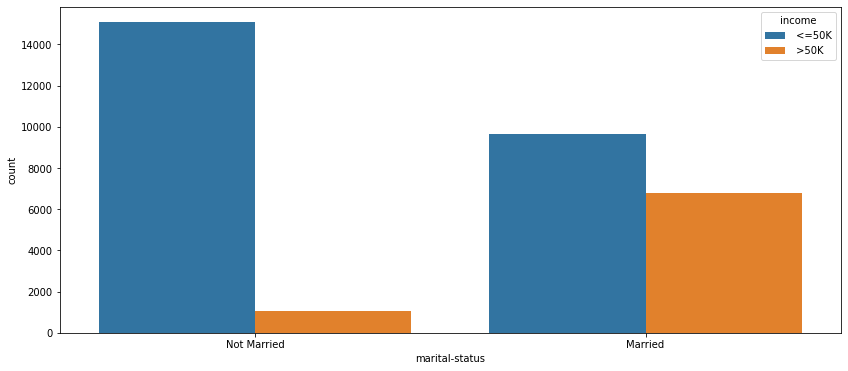

In [32]:
#graph "marital-status" with frequancy of "income"
plt.figure(figsize=(14, 6))
sns.countplot(x='marital-status', hue="income", data=data)

In [33]:
# see unique values in the column "occupation"
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'Other', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
# reorganize categories o "occupation"
data['occupation'].replace(' Adm-clerical| Exec-managerial', 'White-Collar', regex=True, inplace=True)
data['occupation'].replace(' Handlers-cleaners| Craft-repair| Transport-moving| Farming-fishing| Machine-op-inspct| Priv-house-serv', 'Blue-Collar', regex=True, inplace=True)
data['occupation'].replace(' Prof-specialty', 'Professional', regex=True, inplace=True)
data['occupation'].replace(' Other-service| Sales| Tech-support| Protective-serv', 'Service', regex=True, inplace=True)
data['occupation'].replace(' Armed-Forces', 'Other', regex=True, inplace=True)

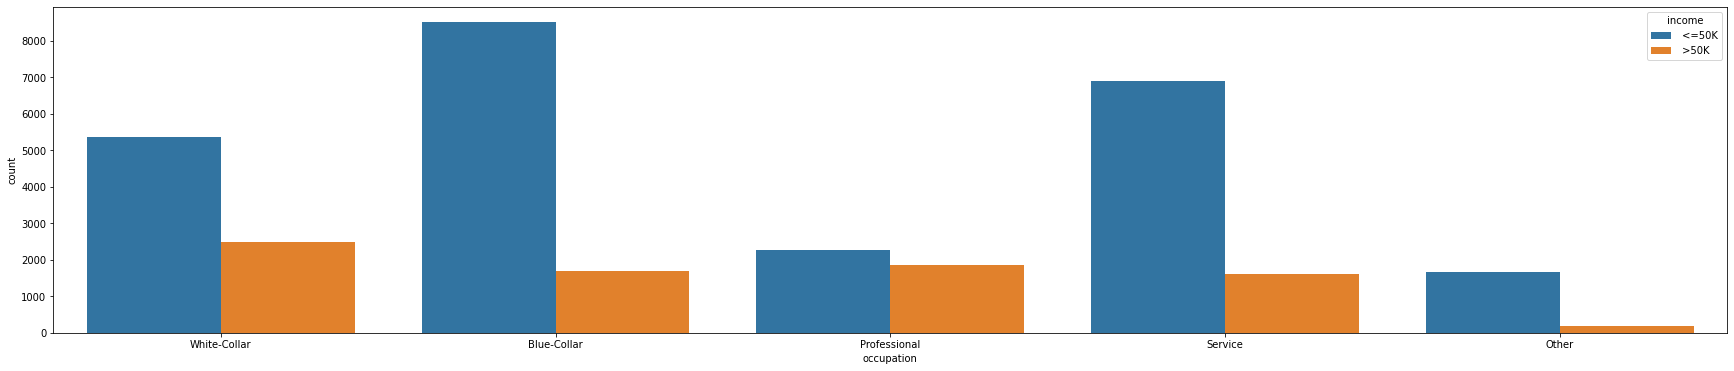

In [35]:
#graph "occupation" with frequancy of " income"
plt.figure(figsize=(30, 6))
sns.countplot(x="occupation", hue="income", data=data)

In [36]:
# see unique values in the column "native-country"
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'Other',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [37]:
# reorganize categories o "native-country"
for x in data.index:
  if data.loc[x, "native-country"]!=" United-States":
    data.loc[x, "native-country"]="Other"

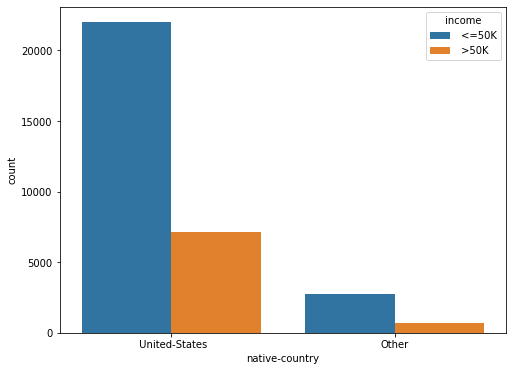

In [38]:
#graph "native-country" with frequancy of " income"
plt.figure(figsize=(8, 6))
sns.countplot(x="native-country", hue="income", data=data)

In [39]:
#calculate net capital
data["netcapitalgain"] = data.apply(lambda x: x["capital-gain"] - x["capital-loss"], axis=1)

Text(0.5, 1.0, 'Net Capital Gain')

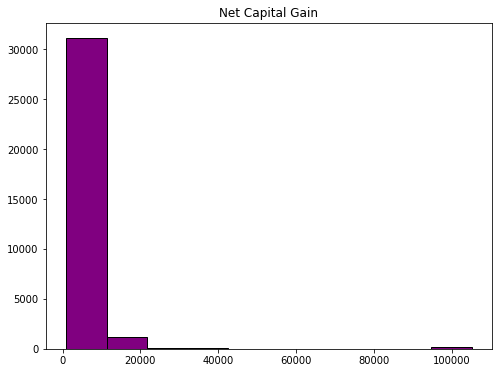

In [40]:
# see distribution of the column "netcapital"
plt.figure(figsize=(8, 6))
plt.hist(data['netcapitalgain'], align='right', color='purple', edgecolor='black')
plt.title("Net Capital Gain")

In [41]:
# since education and education number are almost the same thing, I will drop "education number"
data.drop("education-num", axis=1, inplace=True)

In [42]:
#drop needless columns
data.drop(["capital-gain", "capital-loss" ], axis=1, inplace=True)
data.drop(["fnlwgt"], axis=1, inplace=True)

In [43]:
# create dummy variables
data=pd.get_dummies(data=data, columns=['workclass',  'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
      'native-country'])

In [44]:
data

,age,hours-per-week,income,netcapitalgain,workclass_ Never-worked,workclass_ Private,workclass_Other,workclass_Public service,workclass_Self-employed,education_Bachelors,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ United-States,native-country_Other
0,39,40,<=50K,2174,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,1,0
1,50,13,<=50K,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
2,38,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,53,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28,40,<=50K,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,<=50K,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
32557,40,40,>50K,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
32558,58,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
32559,22,20,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


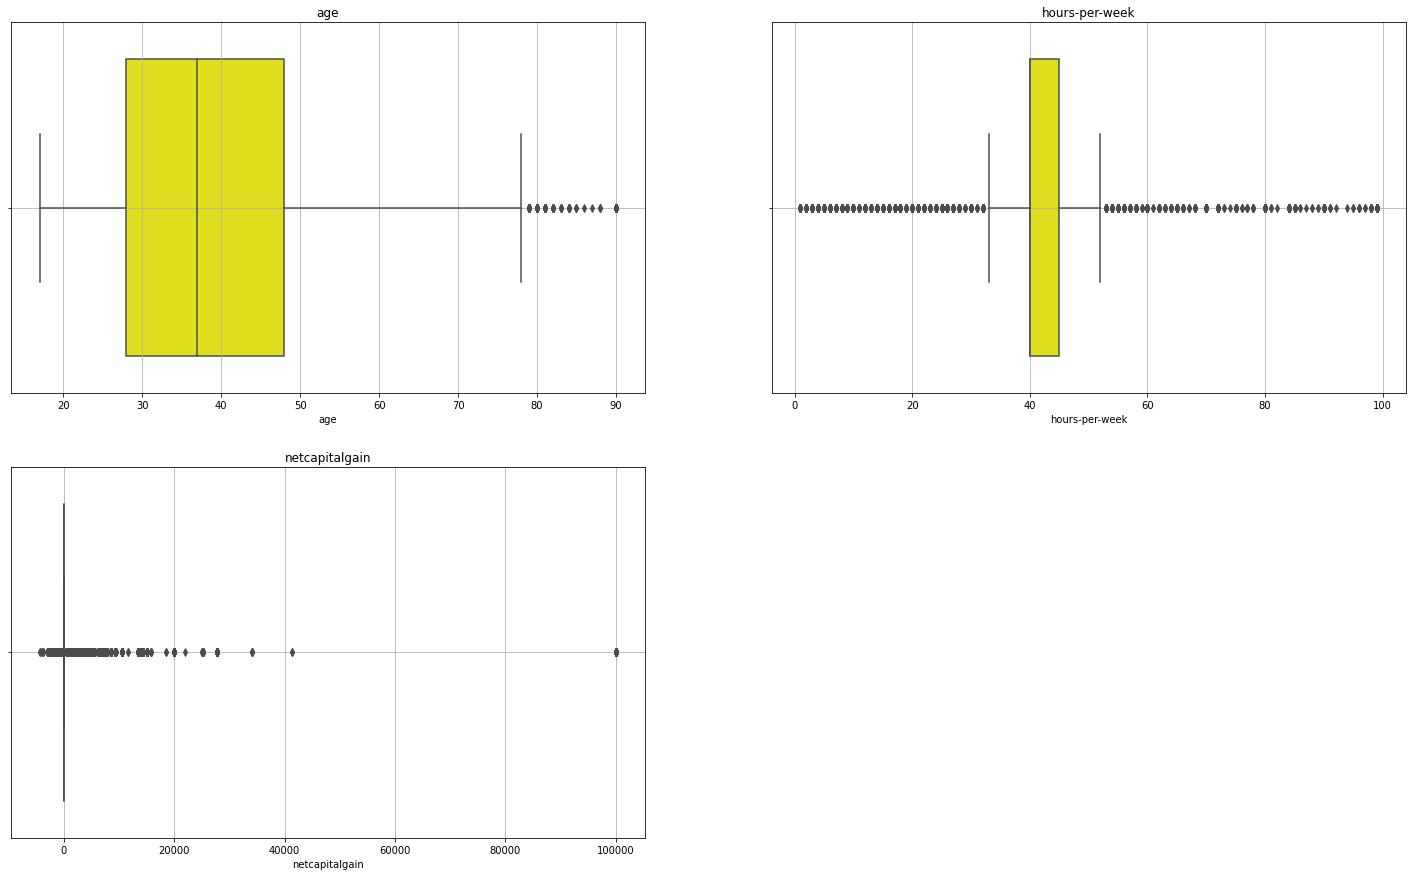

In [45]:
# check outliers
numeric={'age':1,  'hours-per-week':2, 'netcapitalgain':3}

fig=plt.figure(figsize=(25, 15))

for variable, i in numeric.items():
  plt.subplot(2, 2, i)
  sns.boxplot(data[variable], color='yellow', meanline=True)
  plt.title(variable)
  plt.grid(True)

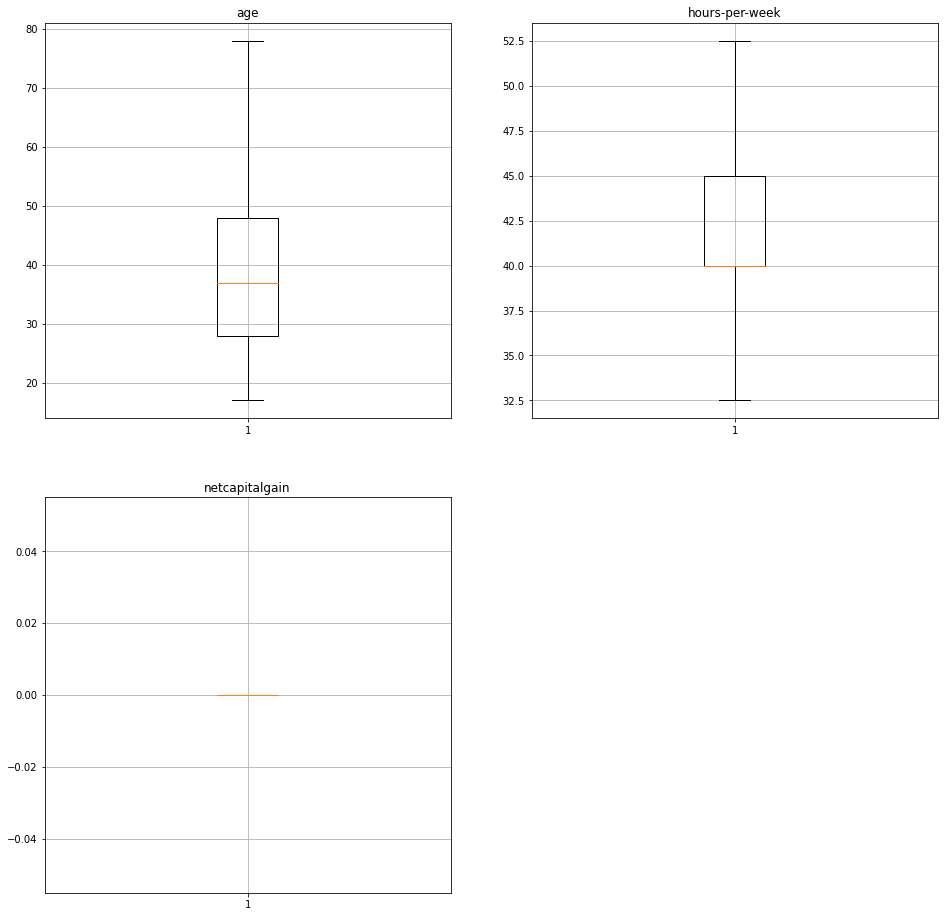

In [46]:
#Handle Outliers
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

X = data.drop(["income"], axis=1)
y=data.income

for cols in numeric:
   upper_bound,lower_bound = outlier_detection(X[cols])
   X[cols] = np.clip(X[cols],a_min=lower_bound,a_max=upper_bound)

fig = plt.figure(figsize=(16,16))

for variable,s in numeric.items():
                     plt.subplot(2,2,s)
                     plt.boxplot(X[variable], meanline=True)
                     plt.title(variable)
                     plt.grid(True)


In [47]:
#encoding target
le= LabelEncoder()
data["income"]=le.fit_transform(data["income"])

In [48]:
data

,age,hours-per-week,income,netcapitalgain,workclass_ Never-worked,workclass_ Private,workclass_Other,workclass_Public service,workclass_Self-employed,education_Bachelors,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ United-States,native-country_Other
0,39,40,0,2174,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,1,0
1,50,13,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
2,38,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,53,40,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28,40,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
32557,40,40,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
32558,58,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
32559,22,20,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


# Splitting

In [49]:
#determine features and target
X=data.drop(["income"], axis=1)
y=data.income

In [50]:
#split dataset as train and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=123)

In [51]:
X_train.iloc[::, 0:3]

,age,hours-per-week,netcapitalgain
10396,60,35,0
30745,22,25,0
21364,49,50,0
32091,34,40,0
27967,49,45,4787
...,...,...,...
2998,38,30,2829
6375,50,20,-2051
1757,40,70,0
27609,67,55,0


# Scaling

In [52]:
# scale train and test
sc = StandardScaler()
X_train.iloc[:, 0:3] = sc.fit_transform(X_train.iloc[:, 0:3])
X_test.iloc[:, 0:3] = sc.transform(X_test.iloc[:, 0:3])

In [53]:
#check amount of the rows and columns in train
X_train.shape, y_train.shape

((26048, 36), (26048,))

In [54]:
#check amount of the rows and columns in test
X_test.shape, y_test.shape

((6513, 36), (6513,))

# **Modeling**

# Decision Tree

In [55]:
#Creat Decision Tree Classifier and fit the model
dt_model=DecisionTreeClassifier(max_depth=9, max_leaf_nodes=28, random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=28, random_state=10)

In [56]:
#check train score
dt_model.score(X_train, y_train)

0.8514665233415234

In [57]:
#check test score
dt_model.score(X_test, y_test)

0.8515277138031629

In [58]:
#predict the model
dt_pred=dt_model.predict(X_test)

**Decision Tree Evaluation** 

In [59]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, dt_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      4945
           1       0.78      0.53      0.63      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.74      0.77      6513
weighted avg       0.85      0.85      0.84      6513



In [60]:
confusion_matrix(y_test, dt_pred)

array([[4714,  231],
       [ 736,  832]])

# KNN 

In [61]:
#Build the model
clf = KNN(n_neighbors = 25)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [62]:
#check train score
clf.score(X_train, y_train)

0.8520423832923832

In [63]:
#check test score
clf.score(X_test, y_test)

0.8490710885920467

In [64]:
#predict the model
clf_pred=clf.predict(X_test)

**Evaluation of KNN** 

In [65]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, clf_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4945
           1       0.74      0.57      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [66]:
confusion_matrix(y_test, clf_pred)

array([[4636,  309],
       [ 674,  894]])

# Naive Bayes

In [67]:
#Build the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [68]:
#Check the train score
naive_bayes.score(X_train, y_train)

0.7379453316953317

In [69]:
#check test score
naive_bayes.score(X_test, y_test)

0.7323813910640258

In [70]:
#predict the model
naive_bayes_pred=naive_bayes.predict(X_test)

**Evaluation of Naive Bayes**

In [71]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, naive_bayes_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79      4945
           1       0.47      0.89      0.62      1568

    accuracy                           0.73      6513
   macro avg       0.71      0.79      0.71      6513
weighted avg       0.84      0.73      0.75      6513



In [72]:
confusion_matrix(y_test, naive_bayes_pred)

array([[3370, 1575],
       [ 168, 1400]])

# SVM

In [73]:
#Build the model
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [74]:
#Check train score
svc.score(X_train, y_train)

0.8565340909090909

In [75]:
#check test score
svc.score(X_test, y_test)

0.8524489482573315

In [76]:
#predict the model
svc_pred=svc.predict(X_test)

# Evalution SVM

In [77]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, svc_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.77      0.55      0.64      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.77      6513
weighted avg       0.85      0.85      0.84      6513



In [78]:
confusion_matrix(y_test, svc_pred)

array([[4693,  252],
       [ 709,  859]])

# Compare the results

In [129]:
accuracy_compare=accuracy_score(y_test, dt_pred), accuracy_score(y_test, naive_bayes_pred), accuracy_score(y_test, svc_pred), accuracy_score(y_test, clf_pred)

In [130]:
Accuracy = pd.DataFrame(accuracy_compare, columns=["Accuracy"], index=["d.Tree","N.Bayes" , "KNN", "SVC"])

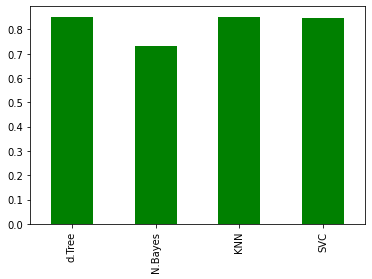

In [132]:
Accuracy.plot(kind='bar', color='green', legend=None)

Among the models N.Bayes has the least accuracy score. Since the dataset is imbalanced it is better to compare f1 score as well.

In [134]:
f1_compare=f1_score(y_test, dt_pred), f1_score(y_test, naive_bayes_pred), f1_score(y_test, svc_pred), f1_score(y_test, clf_pred)

In [136]:
F= pd.DataFrame(f1_compare, columns=["F_score"], index=["d.Tree","N.Bayes" , "KNN", "SVC"])

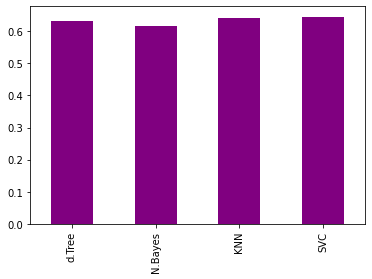

In [138]:
F.plot(kind='bar', color='purple', legend=None)

All modells' scores are about 6. 